In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm



['Ahead_Only', 'Double_Curve', 'Keep_Right', 'Road_Work', 'Speed_Limit_120', 'Speed_Limit_30', 'Speed_Limit_70', 'Speed_Limit_80', 'Speed_Limiy_50', 'Stop']


100%|██████████| 10/10 [01:04<00:00,  6.48s/it]


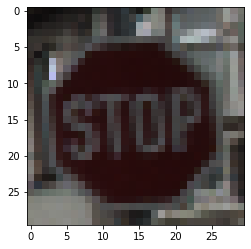

In [2]:
DATADIR = r"Traffic Signs"
#creates list of bird species by iterating through the folder names
CATEGORIES = [str(i) for i in os.listdir(DATADIR)]
print(CATEGORIES)

data = []
for category in tqdm(CATEGORIES):
    #path of each bird species folder
    path = os.path.join(DATADIR, category)
    #every species is assigned a class number from 0 to 19 which 
    #is what the network will to train
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):

        if ".ppm" not in img:
            continue
        #convertes all images into an array
        img_array = cv2.imread(os.path.join(path,img))               
        IMG_SIZE = 30
        
        #resizes the images from 225x225 to 75x75 for speed
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        #changes file from BGR to RGB
        new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
        #appends the class label and the array to a list objext
        data.append([new_array, class_num])
        
        plt.imshow(new_array)

    

In [3]:
import random
random.shuffle(data)


In [4]:
#print(len(data))
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [5]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
